UK Housing Price prediction Using ML Regressions

This dataset is UK housing dataset which is quite large data.Here I had three features and target value was price.Along with that  I had the data in the continuous it means that I have to use the Regression and based on this I used the Regression models.

## Import Libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from datetime import datetime
from pandarallel import pandarallel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import iplot
from IPython.display import IFrame
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

# Loading Data + EDA

In [2]:
#Handling Missing Values
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","-","n.a", "am", '[]', "?:?", "['']", "unknown", "??:??"]
df = pd.read_csv("pp-complete.csv", na_values = missing_value_formats)
# 
display(df.head(5))
print("Shape of train_data :", df.shape)

,{3DD6D1E9-68E3-4646-8682-FD7DB9884D97},76000,1995-11-30 00:00,RG21 5RX,T,N,F,1,Unnamed: 8,LANSLEY ROAD,BASINGSTOKE,BASINGSTOKE.1,BASINGSTOKE AND DEANE,HAMPSHIRE,A,A.1
0,{82899FB9-496F-4FA3-8249-F6811A87F376},48000,1995-01-27 00:00,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,A,A
1,{B7B48D70-7FEB-437B-9EAC-F681547AB62F},59000,1995-11-17 00:00,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,A,A
2,{B75382B6-4B58-4284-A890-FD7E1C297E5D},69950,1995-04-06 00:00,TN2 3HU,S,N,F,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,A,A
3,{B6F968FF-CEB2-4A18-B212-EF6CFE08958D},57850,1995-12-15 00:00,HX7 5DY,S,Y,F,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,A,A
4,{D8DCC736-4537-41E2-A821-EF6CFF2551A9},49950,1995-05-26 00:00,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A


Shape of train_data : (27450498, 16)


In [3]:
df.rename(columns={'{3DD6D1E9-68E3-4646-8682-FD7DB9884D97}': 'Transaction Unique Identifier', '76000': 'Price','1995-11-30 00:00':'Date of Transfer','RG21 5RX':'PostCode','T':'Property_type','N':'Old/New','F':'Duration','1':'House Number','Unnamed: 8':'Flat Type','LANSLEY ROAD':'Street','BASINGSTOKE':'Locality','BASINGSTOKE AND DEANE':'District','HAMPSHIRE':'County','BASINGSTOKE.1':'Town/City','A':'PPDCategory Type','A.1':'Record Status - monthly file only'}, inplace=True)

In [4]:
df.head(2)

,Transaction Unique Identifier,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{82899FB9-496F-4FA3-8249-F6811A87F376},48000,1995-01-27 00:00,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,A,A
1,{B7B48D70-7FEB-437B-9EAC-F681547AB62F},59000,1995-11-17 00:00,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,A,A


In [5]:
df.columns

Index(['Transaction Unique Identifier', 'Price', 'Date of Transfer',
       'PostCode', 'Property_type', 'Old/New', 'Duration', 'House Number',
       'Flat Type', 'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [6]:
df.count()

Transaction Unique Identifier        27450498
Price                                27450498
Date of Transfer                     27450498
PostCode                             27406130
Property_type                        27450498
Old/New                              27450498
Duration                             27450498
House Number                         27446306
Flat Type                             3213996
Street                               27017876
Locality                             17877321
Town/City                            27450498
District                             27450498
County                               27450498
PPDCategory Type                     27450498
Record Status - monthly file only    27450498
dtype: int64

# Data Cleansing

In [7]:
df.isnull().sum()

Transaction Unique Identifier               0
Price                                       0
Date of Transfer                            0
PostCode                                44368
Property_type                               0
Old/New                                     0
Duration                                    0
House Number                             4192
Flat Type                            24236502
Street                                 432622
Locality                              9573177
Town/City                                   0
District                                    0
County                                      0
PPDCategory Type                            0
Record Status - monthly file only           0
dtype: int64

## Droping Columns

Dropping the unnessary columns from the dataset which dont have much impact on the target

In [8]:
df.drop(columns = 'Transaction Unique Identifier', axis = 1, inplace = True)

df.drop(columns = 'PPDCategory Type', axis = 1, inplace = True)
df.drop(columns = 'Record Status - monthly file only', axis = 1, inplace = True)

df.head()

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County
0,48000,1995-01-27 00:00,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE
1,59000,1995-11-17 00:00,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON
2,69950,1995-04-06 00:00,TN2 3HU,S,N,F,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT
3,57850,1995-12-15 00:00,HX7 5DY,S,Y,F,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE
4,49950,1995-05-26 00:00,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE


In [9]:
df.columns

Index(['Price', 'Date of Transfer', 'PostCode', 'Property_type', 'Old/New',
       'Duration', 'House Number', 'Flat Type', 'Street', 'Locality',
       'Town/City', 'District', 'County'],
      dtype='object')

## Removing Extra Time Stamp Text

In [10]:
df['Date of Transfer'] = df['Date of Transfer'].astype("string")
# df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])

df['Date of Transfer'] = df['Date of Transfer'].str.replace(' 00:00', '')

In [11]:
df.head(2)

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County
0,48000,1995-01-27,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE
1,59000,1995-11-17,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON


In [12]:
# df.drop(['House Number', 'Flat Type', 'PostCode','Street', 'Locality','PPDCategory Type', 'Record Status - monthly file only'] ,axis=1, inplace=True)

In [13]:
def check_null_values(df):
    # checking missing data
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

check_null_values(df).head()

,Total,Percent
Flat Type,24236502,88.291666
Locality,9573177,34.874329
Street,432622,1.576008
PostCode,44368,0.161629
House Number,4192,0.015271


## Convert Date into Years, Months and Days

In [14]:
df['year'] = df['Date of Transfer'].apply(lambda x: x.split('-')[0])
df['month'] = df['Date of Transfer'].apply(lambda x: x.split('-')[1])
df['day_of_month'] = df['Date of Transfer'].apply(lambda x: x.split('-')[2])


In [15]:
df.head(5)

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month
0,48000,1995-01-27,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,01,27
1,59000,1995-11-17,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17
2,69950,1995-04-06,TN2 3HU,S,N,F,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,1995,04,06
3,57850,1995-12-15,HX7 5DY,S,Y,F,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,1995,12,15
4,49950,1995-05-26,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,05,26


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450498 entries, 0 to 27450497
Data columns (total 16 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Price             int64 
 1   Date of Transfer  string
 2   PostCode          object
 3   Property_type     object
 4   Old/New           object
 5   Duration          object
 6   House Number      object
 7   Flat Type         object
 8   Street            object
 9   Locality          object
 10  Town/City         object
 11  District          object
 12  County            object
 13  year              object
 14  month             object
 15  day_of_month      object
dtypes: int64(1), object(14), string(1)
memory usage: 3.3+ GB


In [17]:
df.Property_type.value_counts()

T    8260438
S    7522784
D    6333026
F    4929023
O     405227
Name: Property_type, dtype: int64

Terraced Property types are more as compared to rest means people like to have these types of properties

# Removing "O" from Property type 

Removing the Other properety type O from the column property type becasue it has very less value and it has not much impact on the target

In [18]:
df = df[df['Property_type'] != 'O'].copy()

In [19]:
df.head(2)

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month
0,48000,1995-01-27,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,01,27
1,59000,1995-11-17,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17


###  Number of cities:


In [20]:
print('Number of cities:', df['Town/City'].nunique())

Number of cities: 1171


###  Number of recorded transactions for (London):


In [21]:

print("Recorded transactions in London:", df[df['Town/City'] == 'LONDON']['Price'].count())

Recorded transactions in London: 2072191


###  Average property price per year:


In [22]:
df.groupby('year')['Price'].median()

year
1995     54950
1996     57000
1997     60000
1998     65000
1999     72950
2000     80000
2001     90000
2002    110000
2003    130000
2004    150000
2005    157500
2006    166000
2007    175000
2008    170000
2009    168700
2010    182000
2011    176000
2012    180000
2013    184500
2014    190000
2015    202500
2016    215000
2017    225000
2018    230000
2019    230000
2020    247995
2021    265000
2022    260000
Name: Price, dtype: int64

###   Minimum price per year:


In [23]:
df.groupby('year')['Price'].min()

year
1995        1
1996        1
1997        1
1998        1
1999        1
2000        1
2001        1
2002        1
2003      200
2004      280
2005     1500
2006      100
2007        1
2008      200
2009        1
2010     3000
2011      550
2012     6500
2013     1000
2014        1
2015      100
2016        1
2017        1
2018      100
2019        1
2020        1
2021        1
2022    11000
Name: Price, dtype: int64

###  London house price  with respect to years:


In [24]:
london_df = df[df['Town/City'] == 'LONDON'].copy()

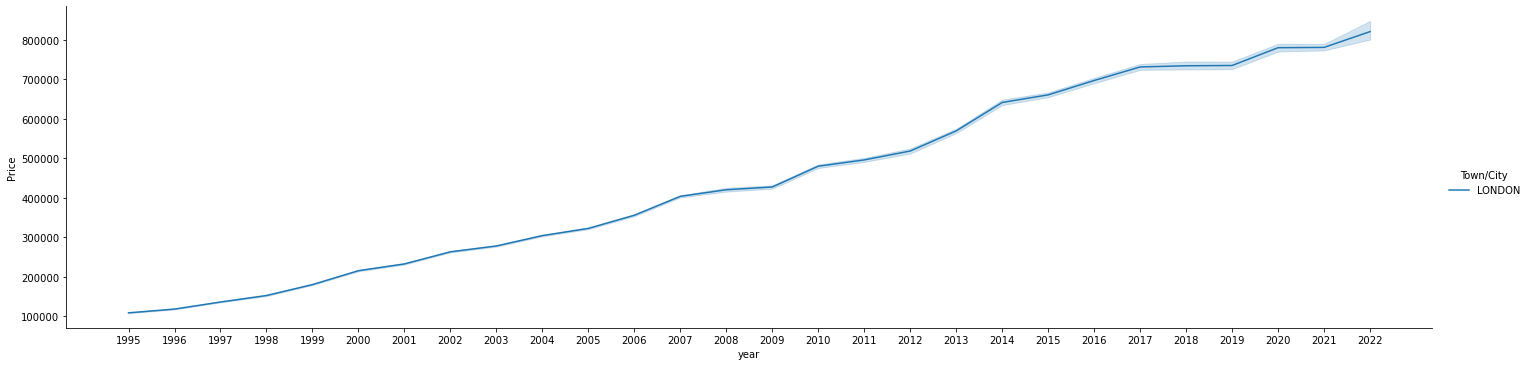

In [25]:
sns.relplot(kind = 'line', data = london_df, x = 'year', y = 'Price', hue = 'Town/City', aspect = 4);

As it can be seen that the Prices per year are increasing which is quite usual trend and as we know that properties in LONDON are much expensive and also its detached


### Transactions distribution per Property Type:

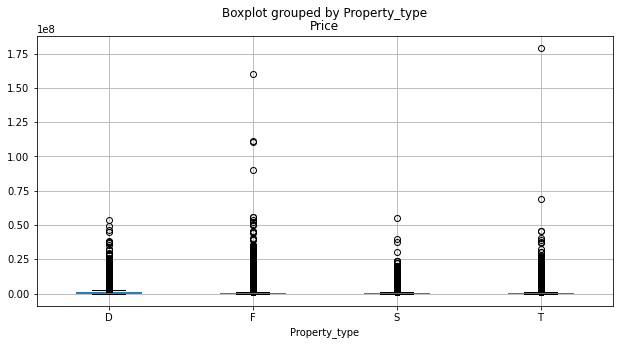

In [26]:
#  (D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes) for London
london_df.boxplot(column = 'Price', by = 'Property_type', figsize = (10,5));

As it can be seen that Price  on differnt Property types has some outliers which  I removed in the letter part.

###  Price distribution for London:
 

<AxesSubplot:xlabel='Price'>

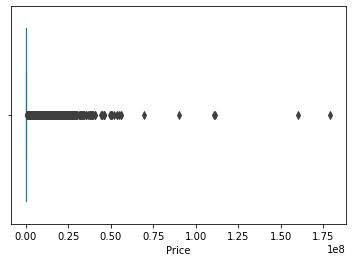

In [27]:
sns.boxplot(data = london_df, x = 'Price', linewidth=0.1 ) 

### Group median price with the year for london

In [28]:
london_price_year_type_df = london_df.groupby(['Property_type', 'year'], as_index = False)['Price'].median()

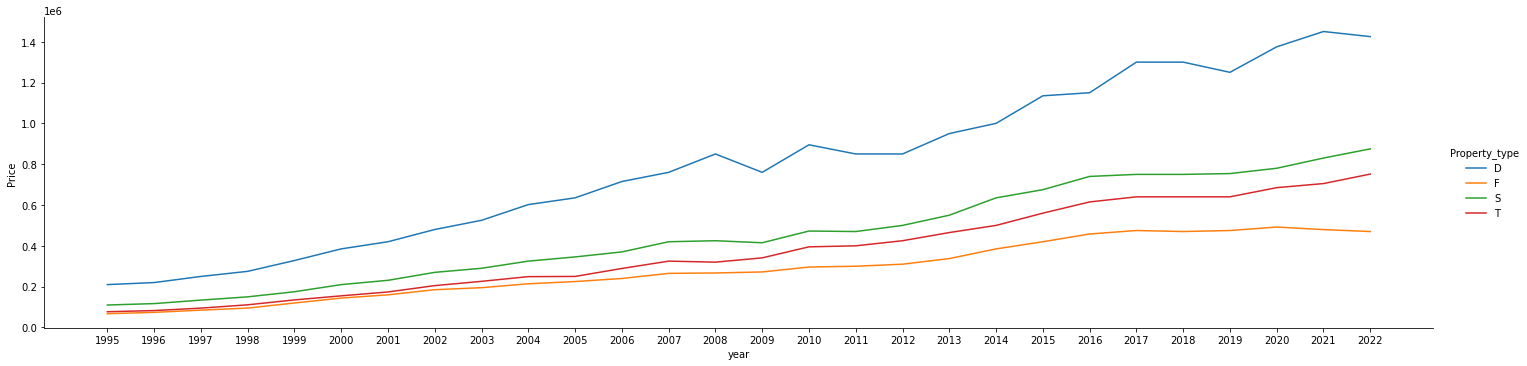

In [29]:
sns.relplot(kind = 'line', data = london_price_year_type_df, 
            x = 'year', y = 'Price', hue = 'Property_type', aspect = 4);

In London the property_type values over the year and trend shows that Detached property types have much worth over the years as compared to rest.

### Top 50 most valued Towns on basis of investments done:

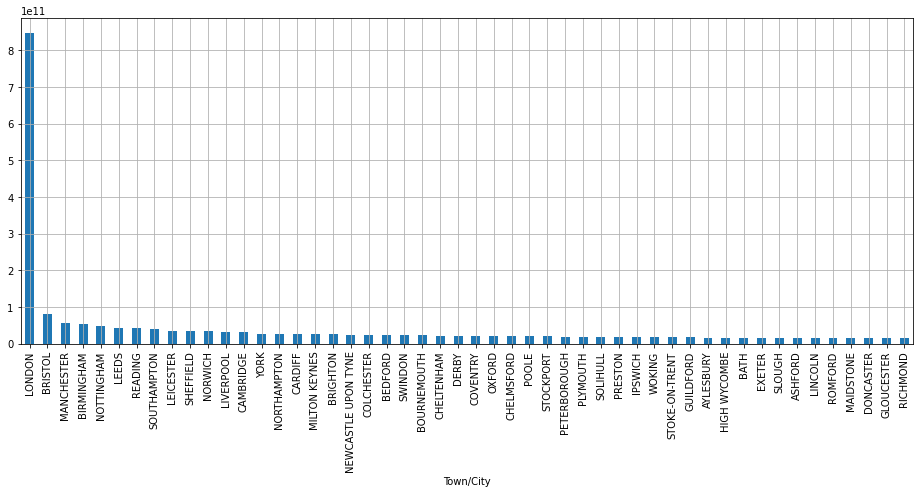

In [30]:
df.groupby(df['Town/City'])['Price'].sum().sort_values(ascending = False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));



London is leading here interms of investments that has been done as compared to other cities of UK

### Top 50 most valued Towns on basis of investments done (median value)

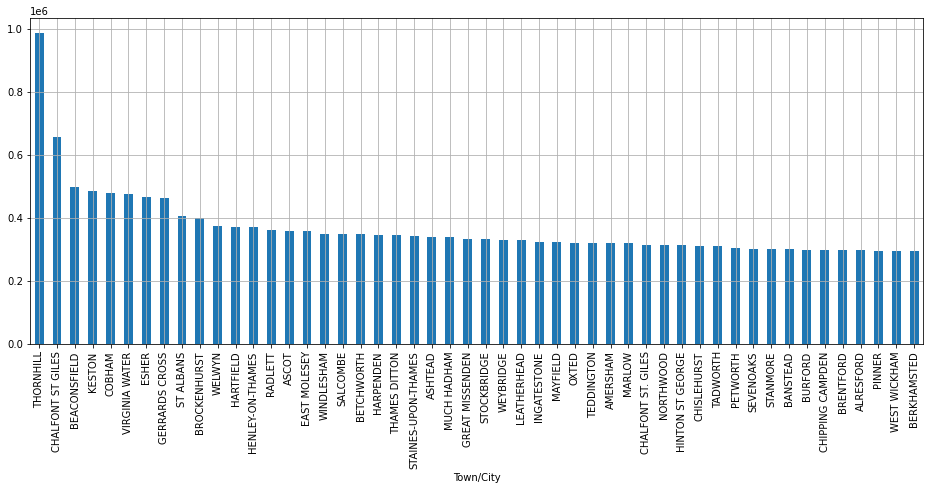

In [31]:
df.groupby(df['Town/City'])['Price'].median().sort_values(ascending = False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));

### Top 50 most valued Towns based on 'NEW' investments done

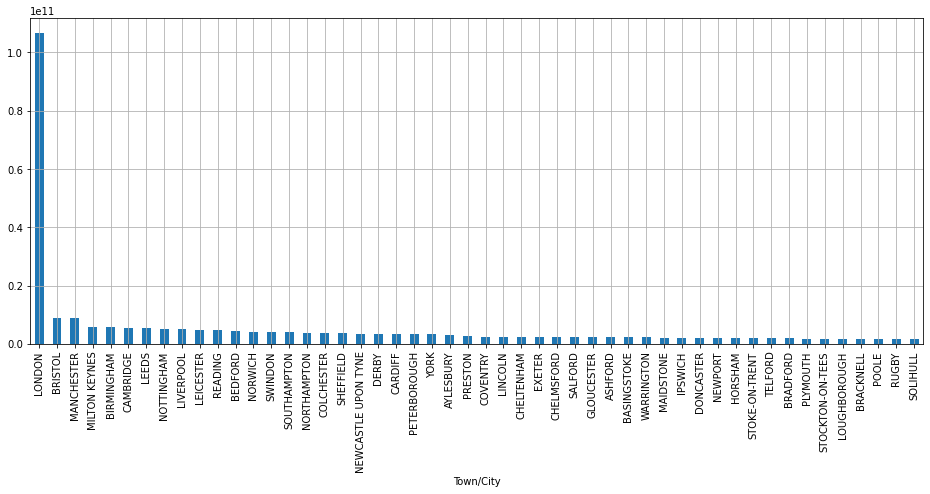

In [32]:
new_properties_df = df[df['Old/New'] == 'Y']

new_properties_df.groupby(new_properties_df['Town/City'])['Price'].sum().sort_values(ascending=False)[:50].plot(
    kind = "bar", grid = True, figsize = (16,6));



Interms of New investments London is also leading here.

### Top 50 most valued Towns based on 'NEW' investments done (median value) 

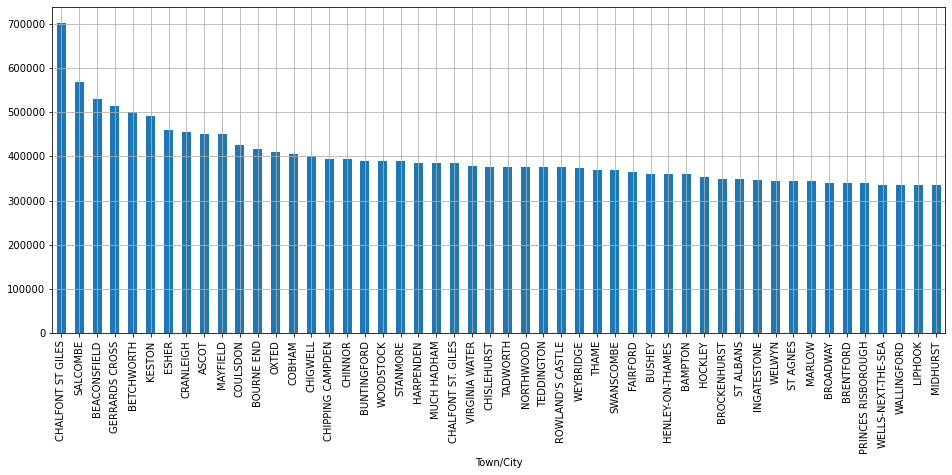

In [33]:
new_properties_df.groupby(new_properties_df['Town/City'])['Price'].median().sort_values(ascending=False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));

Interms of town the CHALFONT ST GILES is leading

In [34]:
df.head()

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month
0,48000,1995-01-27,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,01,27
1,59000,1995-11-17,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17
2,69950,1995-04-06,TN2 3HU,S,N,F,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,1995,04,06
3,57850,1995-12-15,HX7 5DY,S,Y,F,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,1995,12,15
4,49950,1995-05-26,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,05,26


In [35]:
# Data Type Conversion
df['year'] = df['year'].astype('int64')
df['month'] = df['month'].astype('int64')
df['day_of_month'] = df['day_of_month'].astype('int64')


###  A comparison of the last year (2017) and 22 years ago (1995)


In [36]:
df.year.value_counts()

2002    1351418
2006    1325716
2007    1271950
2001    1245513
2003    1235103
2004    1231583
1999    1194562
2000    1129024
1997    1094126
2005    1061133
2021    1059377
1998    1050196
2016    1000076
2015     990565
2017     990333
2014     971685
2018     965139
1996     965020
2019     940871
2020     812545
2013     806369
1995     796831
2012     668533
2010     663091
2011     660937
2008     649398
2009     625079
2022     289098
Name: year, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27045271 entries, 0 to 27450497
Data columns (total 16 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Price             int64 
 1   Date of Transfer  string
 2   PostCode          object
 3   Property_type     object
 4   Old/New           object
 5   Duration          object
 6   House Number      object
 7   Flat Type         object
 8   Street            object
 9   Locality          object
 10  Town/City         object
 11  District          object
 12  County            object
 13  year              int64 
 14  month             int64 
 15  day_of_month      int64 
dtypes: int64(4), object(11), string(1)
memory usage: 3.4+ GB


In [38]:

df_2017 = df[df['year'] == 2017].copy()

df_2017_price_per_month = df_2017.groupby(['Property_type','month'], as_index=False)['Price'].median()

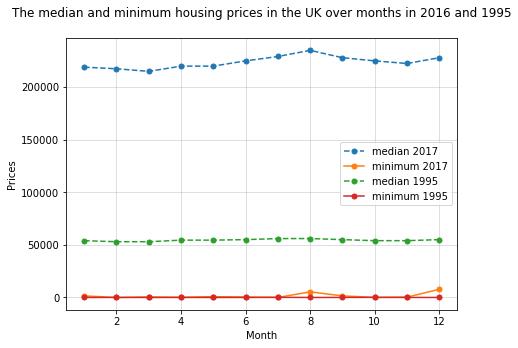

In [39]:

df_1995 = df[df['year'] == 1995].copy()

fig, ax = plt.subplots(figsize = (7,5))

ax.plot(df_2017.groupby('month')['Price'].median(), 
        label='median 2017', linestyle = 'dashed',marker = 'o', markersize = 5);

ax.plot(df_2017.groupby('month')['Price'].min(), 
        label = 'minimum 2017', marker = 'o', markersize = 5);

ax.plot(df_1995.groupby('month')['Price'].median(), 
        label = 'median 1995',linestyle = 'dashed', marker = 'o', markersize = 5);

ax.plot(df_1995.groupby('month')['Price'].min(), 
        label = 'minimum 1995', marker = 'o', markersize = 5);

ax.set(xlabel = 'Month',
       ylabel = 'Prices', 
       title = "The median and minimum housing prices in the UK over months in 2016 and 1995\n")

plt.grid(True, alpha = 0.5)

ax.legend();



C:\Users\ASDF\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



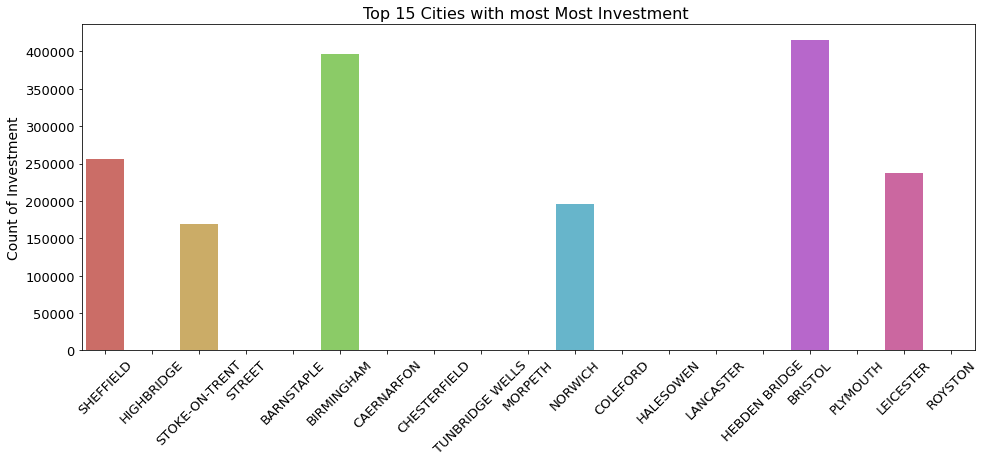

In [45]:
# Top 15 most common elevations
top_15 = list(df['Town/City'].value_counts().head(15).reset_index()['index'])
data = df[df['Town/City'].isin(top_15)]

# === PLOT ===

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['Town/City'], palette='hls', order = df['Town/City'][:20].value_counts().index)

plt.title("Top 15 Cities with most Most Investment ", fontsize=16)
plt.ylabel("Count of Investment", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

### List of towns having max. growth in housing transation from 1995 to 2017

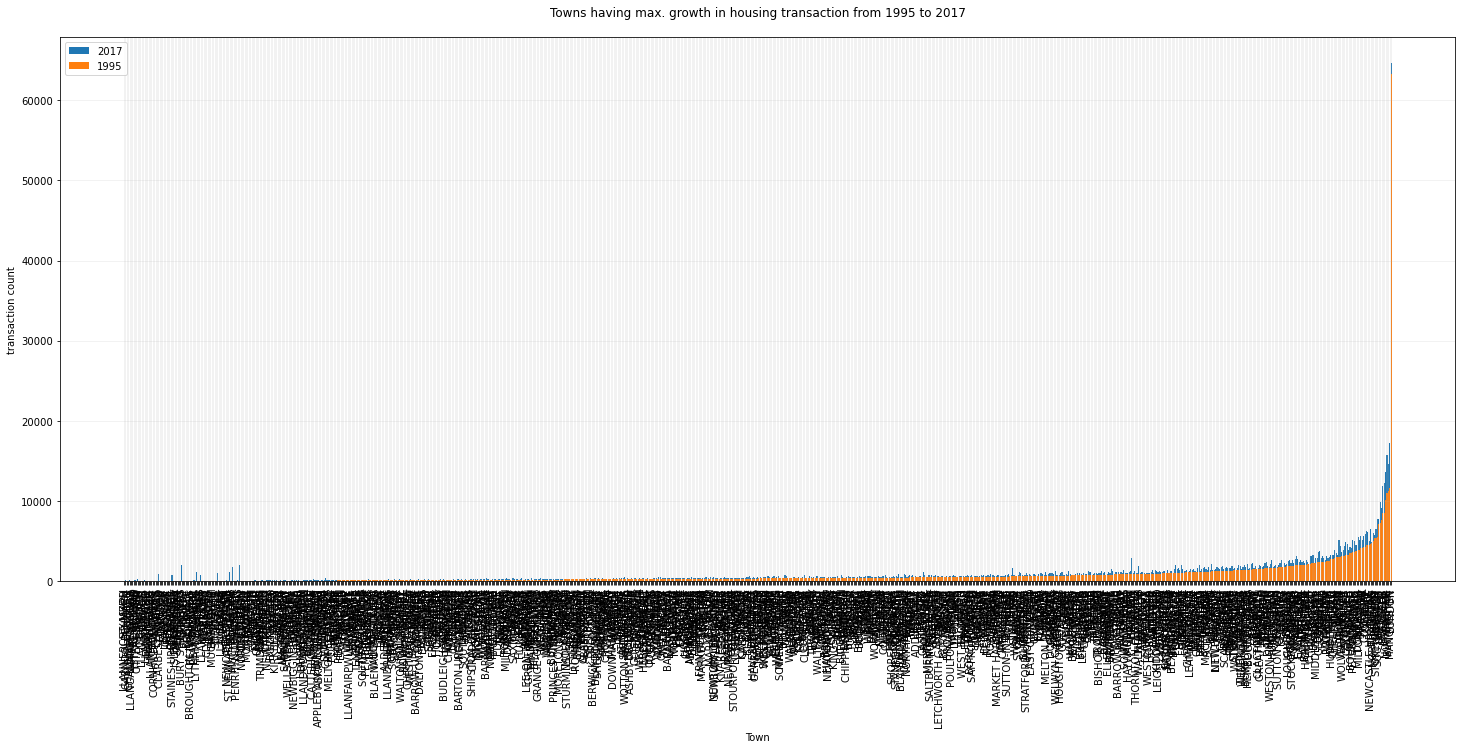

In [48]:
max_g_1 = df_2017.groupby(['Town/City'], as_index = False)['Date of Transfer'].count()
max_g_2 = df_1995.groupby(['Town/City'], as_index = False)['Date of Transfer'].count()

max_g_m = pd.merge(max_g_1, max_g_2, how = 'left', on = 'Town/City')

max_g_m['growth'] = max_g_m['Date of Transfer_x'] - max_g_m['Date of Transfer_y']

gdf_g = max_g_m[max_g_m.growth > 0].sort_values(by='growth', ascending = False)

graph_df = gdf_g[gdf_g['growth'] > 5].sort_values(by = 'Date of Transfer_y')

fig, ax = plt.subplots(figsize=(25, 10))

ax.bar(graph_df['Town/City'],graph_df['Date of Transfer_x'], label = '2017');
ax.bar(graph_df['Town/City'],graph_df['Date of Transfer_y'], label = '1995');

ax.set(xlabel = 'Town',
       ylabel = 'transaction count',
       title = "Towns having max. growth in housing transaction from 1995 to 2017\n")

ax.tick_params(axis = 'x', labelrotation = 90) 

plt.grid(True, alpha = 0.2)

ax.legend();



# Extracting Required Features that were asked(given) in the assesment or a very essential part of Data Preprocessing

#### Feature-1: Property Present in London:

In [49]:
df.columns

Index(['Price', 'Date of Transfer', 'PostCode', 'Property_type', 'Old/New',
       'Duration', 'House Number', 'Flat Type', 'Street', 'Locality',
       'Town/City', 'District', 'County', 'year', 'month', 'day_of_month'],
      dtype='object')

In [50]:
df['Town/City'].head()

0          LANCASTER
1           PLYMOUTH
2    TUNBRIDGE WELLS
3      HEBDEN BRIDGE
4          SHEFFIELD
Name: Town/City, dtype: object

In [51]:
df['Location'] = df['Town/City'].map(lambda x: 1 if 'LONDON' in x else 0)


In [52]:
df['Location'].value_counts()

0    24973080
1     2072191
Name: Location, dtype: int64

In [53]:
df.head(5)

,Price,Date of Transfer,PostCode,Property_type,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month,Location
0,48000,1995-01-27,LA1 1SY,T,N,F,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,1,27,0
1,59000,1995-11-17,PL3 6DR,S,N,F,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17,0
2,69950,1995-04-06,TN2 3HU,S,N,F,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,1995,4,6,0
3,57850,1995-12-15,HX7 5DY,S,Y,F,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,1995,12,15,0
4,49950,1995-05-26,S10 1PG,T,N,F,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,5,26,0


#### Feature-2: The lease duration:

we havae three types of duration so we have to drop the lower lease duration type which is U.others are Freehold and Leasehold duration

In [54]:
df.Duration.value_counts()

F    20684268
L     6360470
U         533
Name: Duration, dtype: int64

In [55]:
df = df[df["Duration"].str.contains("U") == False]

In [56]:
df.Duration.value_counts()

F    20684268
L     6360470
Name: Duration, dtype: int64

#### Converting F and L into "1" and "0":

In [57]:
df['Duration'] = df['Duration'].map(lambda x: 1 if 'F' in x else 0)

### Feature-3 Property Type:
We have four different types of property type like D, F, S and T so we have two option to Encode these fetures.and these property types full names are,Detached,Semi_Detached,Terraced,Flats/Maisonettes.
 1. One Hot Encoding
 2. Label Encoding


In [58]:
enc_df = pd.DataFrame(df, columns = ['Property_type'])
dum_df = pd.get_dummies(df, columns = ["Property_type"], prefix = ["Property_Type_is_"] )
df = enc_df.join(dum_df)
df.drop(columns = 'Property_type', axis = 1, inplace = True)
df.head(5)

,Price,Date of Transfer,PostCode,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month,Location,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
0,48000,1995-01-27,LA1 1SY,N,1,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,1,27,0,0,0,0,1
1,59000,1995-11-17,PL3 6DR,N,1,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17,0,0,0,1,0
2,69950,1995-04-06,TN2 3HU,N,1,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,1995,4,6,0,0,0,1,0
3,57850,1995-12-15,HX7 5DY,Y,1,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,1995,12,15,0,0,0,1,0
4,49950,1995-05-26,S10 1PG,N,1,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,5,26,0,0,0,0,1


### Dependent Variable y EDA:

In [59]:
df["Price"].describe()

count    2.704474e+07
mean     1.975455e+05
std      2.574370e+05
min      1.000000e+00
25%      8.300000e+04
50%      1.450000e+05
75%      2.400000e+05
max      1.790000e+08
Name: Price, dtype: float64

In [60]:
price_mean = df["Price"].mean()
price_median = df["Price"].median()

print('Mean:', price_mean)
print("Median:", price_median)

Mean: 197545.49895007303
Median: 145000.0


In [61]:
df["Price"].skew()

57.72744273459755

As result is showing that the data is right skwed 

By the help of the Log transformation the skewness of the data has been removed

In [62]:
log_transform_price = np.log(df["Price"])

df['Price'] = log_transform_price

print('New skewness:', log_transform_price.skew())

New skewness: -0.06196932611550471


C:\Users\ASDF\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



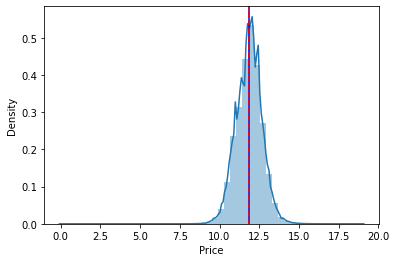

In [63]:
df_mean = df["Price"].mean()
df_median = df["Price"].median()

sns.distplot(df ['Price'])
plt.axvline(x = df_mean, color = 'blue')
plt.axvline(x = df_median, color = "red", linestyle = '--')

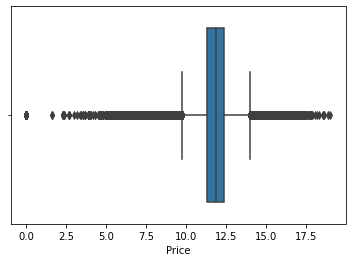

In [64]:
sns.boxplot(data = df, x = 'Price');

In [65]:
lower = 10.2
higher = 13.5

In [66]:
df.count()

Price                  27044738
Date of Transfer       27044738
PostCode               27027524
Old/New                27044738
Duration               27044738
House Number           27040547
Flat Type               3139946
Street                 26645492
Locality               17714392
Town/City              27044738
District               27044738
County                 27044738
year                   27044738
month                  27044738
day_of_month           27044738
Location               27044738
Property_Type_is__D    27044738
Property_Type_is__F    27044738
Property_Type_is__S    27044738
Property_Type_is__T    27044738
dtype: int64

In [67]:
price_outliers_below = df.loc[df['Price'] < lower]
price_outliers_abow = df.loc[df['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than", higher)

548804 entries having 'Price' value lower than  10.2
553808 entries having 'Price' value greater than 13.5


In [68]:
df["Price"] = df["Price"].map(lambda x: lower if x < lower else x)
df["Price"] = df["Price"].fillna(price_mean)

df["Price"] = df["Price"].map(lambda x: higher if x > higher else x)
df["Price"] = df["Price"].fillna(price_mean)

price_outliers_below = df.loc[df['Price'] < lower]
price_outliers_abow = df.loc[df['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than ", lower)

0 entries having 'Price' value lower than  10.2
0 entries having 'Price' value greater than  10.2


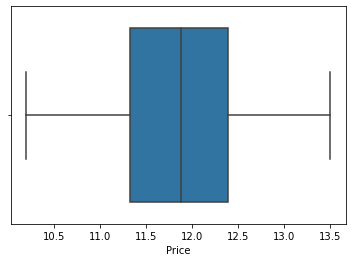

In [69]:
sns.boxplot(data = df, x = 'Price');

As it can be seen that the outliers are now removed and the price column is ok

In [70]:
df.head(5)

,Price,Date of Transfer,PostCode,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month,Location,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
0,10.778956,1995-01-27,LA1 1SY,N,1,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,1,27,0,0,0,0,1
1,10.985293,1995-11-17,PL3 6DR,N,1,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17,0,0,0,1,0
2,11.155536,1995-04-06,TN2 3HU,N,1,227,NaN,GREGGS WOOD ROAD,TUNBRIDGE WELLS,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,1995,4,6,0,0,0,1,0
3,10.965609,1995-12-15,HX7 5DY,Y,1,3,NaN,STREAMSIDE FOLD,MYTHOLMROYD,HEBDEN BRIDGE,CALDERDALE,WEST YORKSHIRE,1995,12,15,0,0,0,1,0
4,10.818778,1995-05-26,S10 1PG,N,1,139,NaN,HEAVYGATE ROAD,SHEFFIELD,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,1995,5,26,0,0,0,0,1


In [71]:
df.to_csv("clean dataset.csv", index=False)

In [2]:
df = pd.read_csv("clean dataset.csv")


In [ ]:
# df.info()

###  Test Train Spliting Data on the base of Years


In [3]:
train_df = df[df["year"] <= 2018]
test_df = df[df["year"] > 2018]

In [4]:
train_df.year.value_counts()

2002    1351313
2006    1325684
2007    1271944
2001    1245428
2003    1234939
2004    1231579
1999    1194538
2000    1128984
1997    1094112
2005    1061108
1998    1050180
2016    1000076
2015     990565
2017     990333
2014     971685
2018     965139
1996     965009
2013     806369
1995     796824
2012     668533
2010     663091
2011     660937
2008     649398
2009     625079
Name: year, dtype: int64

In [5]:
test_df.year.value_counts()

2021    1059377
2019     940871
2020     812545
2022     289098
Name: year, dtype: int64

In [6]:
train_df.head(2)

,Price,Date of Transfer,PostCode,Old/New,Duration,House Number,Flat Type,Street,Locality,Town/City,District,County,year,month,day_of_month,Location,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
0,10.778956,1995-01-27,LA1 1SY,N,1,26,NaN,PORTLAND STREET,LANCASTER,LANCASTER,LANCASTER,LANCASHIRE,1995,1,27,0,0,0,0,1
1,10.985293,1995-11-17,PL3 6DR,N,1,26,NaN,FAIRVIEW AVENUE,PLYMOUTH,PLYMOUTH,PLYMOUTH,DEVON,1995,11,17,0,0,0,1,0


In [7]:
train_df.columns

Index(['Price', 'Date of Transfer', 'PostCode', 'Old/New', 'Duration',
       'House Number', 'Flat Type', 'Street', 'Locality', 'Town/City',
       'District', 'County', 'year', 'month', 'day_of_month', 'Location',
       'Property_Type_is__D', 'Property_Type_is__F', 'Property_Type_is__S',
       'Property_Type_is__T'],
      dtype='object')

In [8]:
train_df = train_df[['Duration', 'Location','Property_Type_is__D', 'Property_Type_is__F', 'Property_Type_is__S','Property_Type_is__T', 'Price' ]]

In [9]:
test_df = test_df[['Duration', 'Location','Property_Type_is__D', 'Property_Type_is__F', 'Property_Type_is__S','Property_Type_is__T', 'Price']]

In [10]:
print("Shape of Train Data:", train_df.shape)
print("Shape of Test Data:", test_df.shape)

Shape of Train Data: (23942847, 7)
Shape of Test Data: (3101891, 7)


### Find corelation between overall columns

<AxesSubplot:>

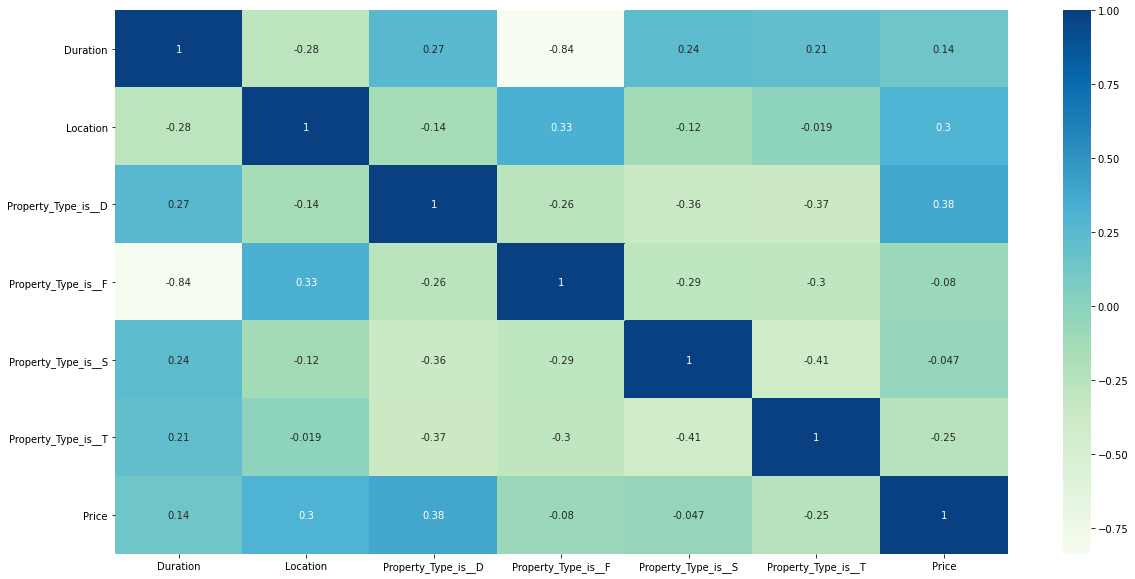

In [11]:
correlation = test_df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation, cmap = "GnBu", annot = True, )

Here we can see that we have the correlation netween the features with the PRICE.Such as lease hold Duration,Location and Property type. 

### Slicing of data into features and dependent variable

In [12]:
X_train = train_df[['Duration', 'Location','Property_Type_is__D', 'Property_Type_is__F', 'Property_Type_is__S','Property_Type_is__T' ]]

In [13]:
y_train = train_df[[ 'Price' ]]

In [14]:
print("Shape of Train Data:", X_train.shape)
print("Shape of Test Data:", y_train.shape)

Shape of Train Data: (23942847, 6)
Shape of Test Data: (23942847, 1)


# Here I commented it mistakenly and now I checked again and I got good results by uncommenting it

### Feature Scaling for training datatset

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [17]:
X_train

array([[ 0.55717585, -0.29123338, -0.55013039, -0.47367064, -0.61969121,
         1.5026006 ],
       [ 0.55717585, -0.29123338, -0.55013039, -0.47367064,  1.61370693,
        -0.66551285],
       [ 0.55717585, -0.29123338, -0.55013039, -0.47367064,  1.61370693,
        -0.66551285],
       ...,
       [-1.79476552, -0.29123338, -0.55013039,  2.11117159, -0.61969121,
        -0.66551285],
       [ 0.55717585, -0.29123338, -0.55013039, -0.47367064, -0.61969121,
         1.5026006 ],
       [ 0.55717585, -0.29123338,  1.81775089, -0.47367064, -0.61969121,
        -0.66551285]])

In [18]:
y_train

array([[-1.33329287],
       [-1.05995655],
       [-0.83443328],
       ...,
       [-0.28368071],
       [ 0.13117378],
       [ 1.24033119]])

In [19]:
X_test = test_df[['Duration', 'Location','Property_Type_is__D', 'Property_Type_is__F', 'Property_Type_is__S','Property_Type_is__T']]

In [20]:
y_test = test_df[['Price']]

In [21]:
print("Shape of Train Data:", X_test.shape)
print("Shape of Test Data:", y_test.shape)

Shape of Train Data: (3101891, 6)
Shape of Test Data: (3101891, 1)


### Feature Scaling for testing datatset

In [22]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [46]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Explained Variance Score (EVS): \n{np.sqrt(metrics.mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"R2: \n{metrics.r2_score(y_train, pred)}")
        print("_______________________________________________")
        print(f"R2 rounded: \n{metrics.r2_score(y_train, pred).round(2)}")
        print("_______________________________________________")
        
   
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Explained Variance Score (EVS): \n{np.sqrt(metrics.mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"R2: \n{metrics.r2_score(y_test, pred)}")
        print("_______________________________________________")
        print(f"R2 rounded: \n{metrics.r2_score(y_test, pred).round(2)}")
        print("_______________________________________________")


In [51]:
# def predict(ml_model):          
#     model=ml_model.fit(X_train,y_train)
#     print('Training score : {}'.format(model.score(X_train,y_train)))
#     y_prediction=model.predict(X_test)
#     print('predictions are: \n {}'.format(y_prediction[:10]))
#     print('\n')
#     r2_score=metrics.r2_score(y_test,y_prediction)
#     print('r2 score: {}'.format(r2_score))
#     print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
#     print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
#     print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
# #     sns.distplot(y_test-y_prediction)

In [53]:
# predict(ls)

### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.9212142365613168
_______________________________________________
Mean Squared Error: 0.8486356696432499
_______________________________________________
Mean Absolute Error: 
0.7472385876722597
_______________________________________________
Explained Variance Score (EVS): 
0.9212142365613168
_______________________________________________
R2: 
0.15136433035675034
_______________________________________________
R2 rounded: 
0.15
_______________________________________________
Test Result:
Root Mean Squared Error: 0.8903499567234797
_______________________________________________
Mean Squared Error: 0.7927230454375022
_______________________________________________
Mean Absolute Error: 
0.7140309926210415
_______________________________________________
Explained Variance Score (EVS): 
0.8903499567234797
_______________________________________________
R2: 
0.20727695456249762
_______________________________________________
R2 rounded: 
0.21
_______

### Ridge Regression

In [49]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

Train Result:
Root Mean Squared Error: 0.9010610998760182
_______________________________________________
Mean Squared Error: 0.8119111057097796
_______________________________________________
Mean Absolute Error: 
0.73235833607144
_______________________________________________
Explained Variance Score (EVS): 
0.9010610998760182
_______________________________________________
R2: 
0.18808889429022047
_______________________________________________
R2 rounded: 
0.19
_______________________________________________
Test Result:
Root Mean Squared Error: 0.8419338363396238
_______________________________________________
Mean Squared Error: 0.7088525847735564
_______________________________________________
Mean Absolute Error: 
0.6737144919293468
_______________________________________________
Explained Variance Score (EVS): 
0.8419338363396238
_______________________________________________
R2: 
0.2911474152264435
_______________________________________________
R2 rounded: 
0.29
__________

As we can see that our results are best now after standerdization and the model is performing very well and R2 score is also good which means no more overfitting.

# Model Evaluation 

In [55]:

# Let's evaluate the model by checking out it's coefficients and how we can interpret them.

# print the intercept
print('Lasso Intercept',lm.intercept_)
print('Lasso Coef',lm.coef_)
print("--------------------------------------------------")
print('Reig Intercept',lm.intercept_)
print('Reid Coef',lm.coef_)

Lasso Intercept [-1.14496038e-08]
Lasso Coef [[ 1.47743393e-01  2.83382373e-01 -3.66388113e+07 -3.35635014e+07
  -3.88450023e+07 -4.00146756e+07]]
--------------------------------------------------
Reig Intercept [-1.14496038e-08]
Reid Coef [[ 1.47743393e-01  2.83382373e-01 -3.66388113e+07 -3.35635014e+07
  -3.88450023e+07 -4.00146756e+07]]


Here we just gave some model evaluation results such as intercept Reid coef